<a href="https://colab.research.google.com/github/OswaldoMoper/Mathematical_Data_Analysis/blob/master/Data%20Analysis/Analysis_7_(_Sentiment_analysis_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
from nltk.corpus import movie_reviews
import random
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
import re, string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
documents = [ ( list ( movie_reviews.words( fileid ) ), category )
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids( category ) ]
random.shuffle( documents )

In [ ]:
len( documents )

2000

In [ ]:
all_words = nltk.FreqDist( w.lower() for w in movie_reviews.words() )
word_features = list( all_words )[:2000]

In [ ]:
def document_features( document ):
    document_words = set( document )
    features = {}
    for word in word_features:
        features[ 'contains({})'.format( word ) ] = ( word in document_words )
    return features

In [ ]:
featuresets = [ ( document_features( d ), c ) for ( d, c) in documents ]
train_set, test_set = featuresets[:1600], featuresets[1600:]
classifier = nltk.NaiveBayesClassifier.train( train_set )

In [ ]:
print( nltk.classify.accuracy( classifier, test_set ) )

0.7875


In [ ]:
classifier.show_most_informative_features( 10 )

Most Informative Features
   contains(outstanding) = True              pos : neg    =     19.5 : 1.0
        contains(seagal) = True              neg : pos    =     10.5 : 1.0
          contains(lame) = True              neg : pos    =      6.4 : 1.0
         contains(awful) = True              neg : pos    =      6.3 : 1.0
   contains(wonderfully) = True              pos : neg    =      5.6 : 1.0
    contains(ridiculous) = True              neg : pos    =      5.5 : 1.0
          contains(dull) = True              neg : pos    =      5.4 : 1.0
         contains(waste) = True              neg : pos    =      5.1 : 1.0
         contains(damon) = True              pos : neg    =      4.7 : 1.0
        contains(wasted) = True              neg : pos    =      4.6 : 1.0


In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
texts = [ 'I love this prduct! It works great and is very affordable.'
        , 'This product is okay. It gets the job done, but could be better.'
        , "I hate this product. It doesn't wotk at all and is a waste of money."
        , 'Its relly bad, it dosnt work fine' ]

In [ ]:
for text in texts:
  score = analyzer.polarity_scores( text )
  print( text )
  print( score )

I love this prduct! It works great and is very affordable.
{'neg': 0.0, 'neu': 0.482, 'pos': 0.518, 'compound': 0.8622}
This product is okay. It gets the job done, but could be better.
{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.6486}
I hate this product. It doesn't wotk at all and is a waste of money.
{'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'compound': -0.7579}
Its relly bad, it dosnt work fine
{'neg': 0.34, 'neu': 0.485, 'pos': 0.175, 'compound': -0.4019}


In [ ]:
df_1 = pd.read_csv('/content/reviews_1.csv')
df_2 = pd.read_csv('/content/reviews_2.csv')

df = pd.concat( [ df_1, df_2 ], ignore_index=True )
df.head()

,id,text,label
0,0,We started giving this to my 5 year old Labrad...,dogs
1,1,This product is easy to set up and use. I have...,dogs
2,2,my dog has nerves and wants to itch and chew.....,dogs
3,3,the breeded gave us a can of Nupro when we too...,dogs
4,4,"Very study, well made poop bag. Easy to open a...",dogs


In [ ]:
df_count = pd.DataFrame( df[ 'label' ].value_counts() ).reset_index()
df_count.columns = [ 'label', 'count' ]

fig = px.bar( df_count, x='label', y='count', text = 'count', title = 'Pets Count', template = 'plotly_dark', color='label' )
fig.show()

In [ ]:
sent = 'Hello world! I love this class, I like Data Science'

sent.split(' ')

['Hello',
 'world!',
 'I',
 'love',
 'this',
 'class,',
 'I',
 'like',
 'Data',
 'Science']

In [ ]:
word_tokenize( sent )

['Hello',
 'world',
 '!',
 'I',
 'love',
 'this',
 'class',
 ',',
 'I',
 'like',
 'Data',
 'Science']

In [ ]:
sent_tokenize( sent )

['Hello world!', 'I love this class, I like Data Science']

In [ ]:
comments = []
for comment in df[ 'text' ]:
  comments.append( list( word_tokenize( str( comment  ).lower() ) ) )
comments[0]

['we',
 'started',
 'giving',
 'this',
 'to',
 'my',
 '5',
 'year',
 'old',
 'labrador',
 'retriever',
 '(',
 'female',
 ')',
 'she',
 'has',
 'arthritis',
 'problems',
 'along',
 'with',
 'weakness',
 'in',
 'her',
 'back',
 'legs',
 'and',
 'it',
 'seems',
 'to',
 'help',
 'a',
 'little',
 'bit',
 ',',
 'would',
 'not',
 'hurt',
 'to',
 'try',
 'it']

In [ ]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

In [ ]:
all_words = list( get_all_words( comments ) )
all_words

['we',
 'started',
 'giving',
 'this',
 'to',
 'my',
 '5',
 'year',
 'old',
 'labrador',
 'retriever',
 '(',
 'female',
 ')',
 'she',
 'has',
 'arthritis',
 'problems',
 'along',
 'with',
 'weakness',
 'in',
 'her',
 'back',
 'legs',
 'and',
 'it',
 'seems',
 'to',
 'help',
 'a',
 'little',
 'bit',
 ',',
 'would',
 'not',
 'hurt',
 'to',
 'try',
 'it',
 'this',
 'product',
 'is',
 'easy',
 'to',
 'set',
 'up',
 'and',
 'use',
 '.',
 'i',
 'have',
 'a',
 'new',
 'puppy',
 'border',
 'collie',
 'who',
 'will',
 'be',
 'fullgrown',
 'around',
 '50',
 '#',
 '.',
 'the',
 'crate',
 'would',
 'still',
 'have',
 'lots',
 'of',
 'room',
 'for',
 'her',
 '.',
 'i',
 'purchased',
 'this',
 'thru',
 'amazon',
 'which',
 'is',
 'very',
 'convienience',
 'because',
 'the',
 'delivery',
 'person',
 'carried',
 'it',
 'right',
 'to',
 'my',
 'door',
 '.',
 'total',
 'cost',
 'was',
 'cheaper',
 'than',
 'the',
 'local',
 'pet',
 'stores',
 '.',
 'yep',
 '!',
 '!',
 'i',
 'love',
 'amazon',
 '.',
 'my

In [ ]:
WF = nltk.FreqDist( all_words )
WFdf = pd.DataFrame( WF.most_common( 30 ) )#, columns = [ 'word', 'count' ] )
WFdf.columns = [ 'Word', 'Count' ]

fig2 = px.bar( WFdf, x='Count', y='Word', orientation = 'h', text = 'Count', width = 1000, height = 750
             , template = 'plotly_dark', title = 'Word Count - 1 ' )

fig2.show()

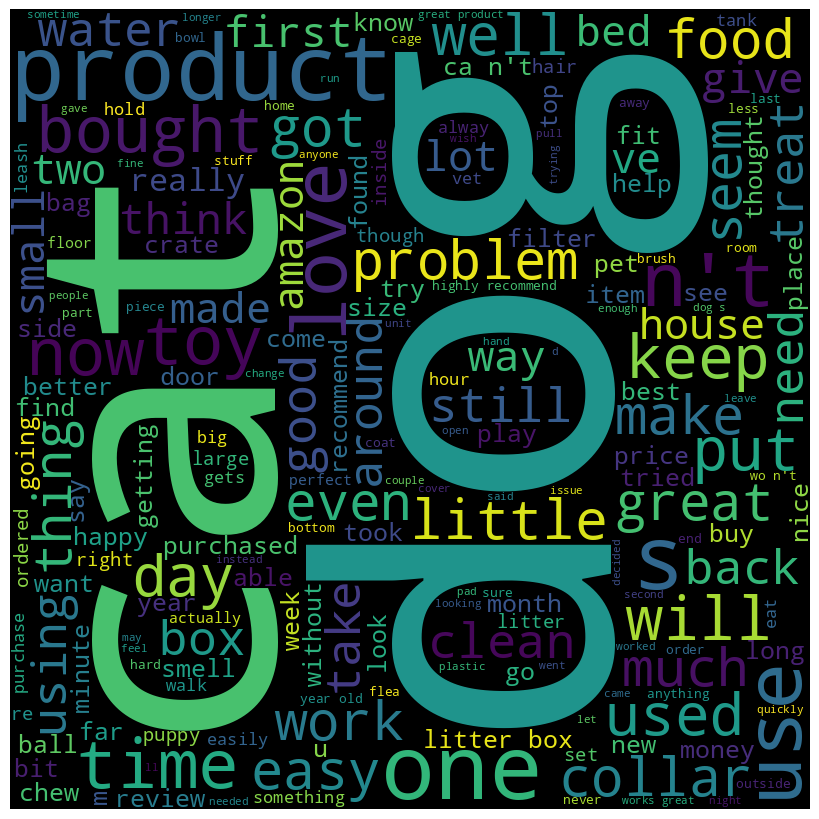

In [ ]:
comment_word = ''
comment_word += ' '.join( all_words ) + ' '

wordcloud = WordCloud( width = 800, height = 800
                     , background_color = 'black'
                     , min_font_size = 10 ).generate( comment_word )

plt.figure( figsize = ( 8, 8 ), facecolor = None )
plt.imshow( wordcloud )
plt.axis( "off" )
plt.tight_layout( pad = 0 )

plt.show()

In [ ]:
def remove_noise(comment, stop_words = ()):
    lemmatizer = WordNetLemmatizer()
    cleaned_tokens = []
    for token, tag in pos_tag(comment):
      # Limpieza de comentarios
        token = re.sub(r'\W', ' ', token)
        token = re.sub(r'\s+[a-zA-Z]\s+', ' ', token)
        token = re.sub(r'\^[a-zA-Z]\s+', ' ', token)
        token = re.sub(r'\s+', ' ', token, flags=re.I)
        token = re.sub(r'^b\s+', '', token)
        token = re.sub(' +', ' ', token)
        # Corrección ( Particular )
        if token == 'n t':
          token = 'not'
        if token == ' s':
          token = 'is'
        if token == 've':
          token = 'have'
        if token == 'ca':
          token = 'can'
        if token == 'wo':
          token = 'will'
        # Forma Base
        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        token = lemmatizer.lemmatize(token, pos = pos)
        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [ ]:
lemmatizer = WordNetLemmatizer()
sent = 'Hello, I am Oswaldo Moper. I am happy!'
sent_t = word_tokenize( sent )

pos_tag( sent_t )

[('Hello', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('Oswaldo', 'NNP'),
 ('Moper', 'NNP'),
 ('.', '.'),
 ('I', 'PRP'),
 ('am', 'VBP'),
 ('happy', 'JJ'),
 ('!', '.')]

In [ ]:
pos_tag ( sent_t, tagset = 'universal' )

[('Hello', 'NOUN'),
 (',', '.'),
 ('I', 'PRON'),
 ('am', 'VERB'),
 ('Oswaldo', 'NOUN'),
 ('Moper', 'NOUN'),
 ('.', '.'),
 ('I', 'PRON'),
 ('am', 'VERB'),
 ('happy', 'ADJ'),
 ('!', '.')]

In [ ]:
for word, tag in pos_tag( sent_t ):
  if tag.startswith("NN"):
    pos = 'n'
  elif tag.startswith('VB'):
    pos = 'v'
  else:
    pos = 'a'
  print( lemmatizer.lemmatize( word, pos = pos ) )

Hello
,
I
be
Oswaldo
Moper
.
I
be
happy
!


In [ ]:
stop_words = set( stopwords.words( 'english' ) )
stop_words.update( [ ' ' ] )
stop_words

{' ',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own

In [ ]:
clean_comments = []
for comment in comments:
  clean_comments.append( remove_noise( comment, stop_words ) )
clean_comments[0]

['start',
 'give',
 '5',
 'year',
 'old',
 'labrador',
 'retriever',
 'female',
 'arthritis',
 'problem',
 'along',
 'weakness',
 'back',
 'leg',
 'seem',
 'help',
 'little',
 'bit',
 'would',
 'hurt',
 'try']

In [ ]:
comments[0]

['we',
 'started',
 'giving',
 'this',
 'to',
 'my',
 '5',
 'year',
 'old',
 'labrador',
 'retriever',
 '(',
 'female',
 ')',
 'she',
 'has',
 'arthritis',
 'problems',
 'along',
 'with',
 'weakness',
 'in',
 'her',
 'back',
 'legs',
 'and',
 'it',
 'seems',
 'to',
 'help',
 'a',
 'little',
 'bit',
 ',',
 'would',
 'not',
 'hurt',
 'to',
 'try',
 'it']

In [ ]:
all_words2 = list( get_all_words( clean_comments ) )

In [ ]:
WF = nltk.FreqDist( all_words2 )
WFdf = pd.DataFrame( WF.most_common( 30 ) )
WFdf.columns = [ 'Word', 'Count' ]

fig3 = px.bar( WFdf, x='Count', y='Word', orientation = 'h', text = 'Count', width = 1000, height = 750
             , template = 'plotly_dark', title = 'Word Count - 2 ' )

fig3.show()

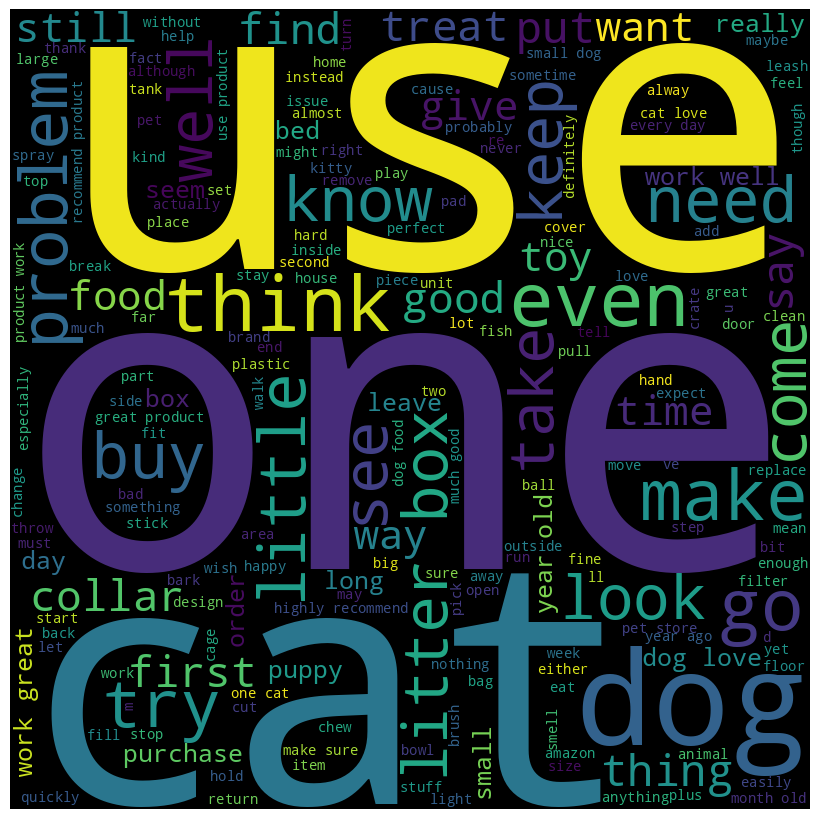

In [ ]:
comment_words = ''
comment_words += ' '.join( all_words2 ) + ' '

wordcloud = WordCloud( width = 800, height = 800
                     , background_color = 'black'
                     , min_font_size = 10 ).generate( comment_words )

plt.figure( figsize = ( 8, 8 ), facecolor = None )
plt.imshow( wordcloud )
plt.axis( "off" )
plt.tight_layout( pad = 0 )

plt.show()

In [ ]:
text = nltk.Text( all_words2 )
finder = nltk.collocations.BigramCollocationFinder.from_words( text )
df_2 = pd.DataFrame.from_dict( finder.ngram_fd.most_common( 30 ) )
df_2.columns = [ 'Words', 'Count' ]
df_2.head()

,Words,Count
0,"(litter, box)",4431
1,"(dog, love)",3238
2,"(work, great)",2937
3,"(work, well)",2858
4,"(year, old)",2689


In [ ]:
comments = []
for l in df_2[ 'Words' ]:
  comments.append( " ".join( l ) )
df_2[ 'Words' ] = pd.Series( comments )
fig3 = px.bar( df_2, x = 'Count', y = 'Words', orientation = 'h', text = 'Count', width = 1000, height = 750
             , template = 'plotly_dark', title = 'Word Count - 2' )
fig3.show()

In [ ]:
finder = nltk.collocations.TrigramCollocationFinder.from_words( text )
df_3 = pd.DataFrame.from_dict( finder.ngram_fd.most_common( 30 ) )
df_3.columns = [ 'Words', 'Frequency' ]
df_3.head()
comments = []
for l in df_3[ 'Words' ]:
  comments.append( " ".join( l ) )
df_3[ 'Words' ] = pd.Series( comments )

fig4 = px.bar( df_3, x = 'Frequency', y = 'Words', orientation = 'h', text = 'Frequency', width = 1000, height = 750
             , template = 'plotly_dark', title = 'Word Count - 3' )
fig4.show()

In [ ]:
finder = nltk.collocations.QuadgramCollocationFinder.from_words( text )
df_4 = pd.DataFrame.from_dict( finder.ngram_fd.most_common( 30 ) )
df_4.columns = [ 'Words', 'Frequency' ]
df_4.head()
comments = []
for l in df_4[ 'Words' ]:
  comments.append( " ".join( l ) )
df_4[ 'Words' ] = pd.Series( comments )

fig5 = px.bar( df_4, x = 'Frequency', y = 'Words', orientation = 'h', text = 'Frequency', width = 1000, height = 750
             , template = 'plotly_dark', title = 'Word Count - 4' )
fig5.show()

In [ ]:
analyzer = SentimentIntensityAnalyzer()
score_list = list()

for comment in df.text:
  score = analyzer.polarity_scores( comment )
  score_list.append( score[ 'compound' ] )

df[ 'SS' ] = pd.Series( score_list )
df.head()

,id,text,label,SS
0,0,We started giving this to my 5 year old Labrad...,dogs,0.3348
1,1,This product is easy to set up and use. I have...,dogs,0.9059
2,2,my dog has nerves and wants to itch and chew.....,dogs,-0.8176
3,3,the breeded gave us a can of Nupro when we too...,dogs,0.9184
4,4,"Very study, well made poop bag. Easy to open a...",dogs,-0.1182


In [ ]:
df.drop( 'compound', axis = 1, inplace = True )

In [ ]:
df.loc[ df.SS >= 0.25, 'Sentiment' ] = 'Positive'
df.loc[ ( df.SS < 0.25 ) & ( df.SS > -0.25 ), 'Sentiment' ] = 'Neutral'
df.loc[ df.SS <= -0.25, 'Sentiment' ] = 'Negative'
df.head()

,id,text,label,SS,Sentiment
0,0,We started giving this to my 5 year old Labrad...,dogs,0.3348,Positive
1,1,This product is easy to set up and use. I have...,dogs,0.9059,Positive
2,2,my dog has nerves and wants to itch and chew.....,dogs,-0.8176,Negative
3,3,the breeded gave us a can of Nupro when we too...,dogs,0.9184,Positive
4,4,"Very study, well made poop bag. Easy to open a...",dogs,-0.1182,Neutral


In [ ]:
# Usar NaiveBayes para darle un peso a las scuderias de la F1

In [ ]:
df_sentiment = df.Sentiment.value_counts().reset_index()
df_sentiment.columns = [ 'Sentiment', 'Count' ]

fig6 = px.pie( df_sentiment, values = 'Count', names = 'Sentiment', template = 'plotly_dark', title = 'Sentiment Analysis' )
fig6.update_traces( textposition = 'inside', textinfo = 'percent+label' )
fig6.update_layout( showlegend = False )
fig6.show()

In [ ]:
for index, row in df[ df.Sentiment == 'Positive' ].sort_values( [ 'SS' ], ascending = False ).head( ).iterrows():
  print( row.text, row.SS )

My little best friend is almost 15. As a kitten, she swallowed magnets (playing with those darn pics we all post on our fridge. Tell all you know - don't do that! Use a photo album or tape instead!) Ever since her little lifesaving surgery, she can only eat certain kibble and only 10 or so of them at a time, and each feeding spaced well enough apart. Any more, and she'll get sick.Needless to say, she is always begging. She just doesn't understand her situation until it's too late. And then, well - it's too late for my carpet. Not to mention that she doesn't feel well afterwards.She has been healthy as a horse otherwise until a scare a few months back. At the vet visit, she weighed in at a mere 5.5 lbs (runt of the litter, asian persuasion --not starvation by me). While she was deemed utterly healthy (and sweet :) by the vet (albeit, diagnosed with severe hip dysplasia --the probable reason for her 'unwellness moment' (see my Excel Glucosamine Cat Paste review)), I felt as though we cou

In [ ]:
for index, row in df[ df.Sentiment == 'Neutral' ].sort_values( [ 'SS' ], ascending = False ).head( ).iterrows():
  print( row.text, row.SS )

the crate is overall nice, light, convenient to setup and fold for transport. The pockets are great and handy to keep clutter out of sight. the only criticism would be the mesh on the sides isn't bulletproof strong, seems to be a tough coated plastic mesh but my bulldog who is teething was able to chew a small hole through it which if she continues, would render the crate unusable, if your dog is not a chewer it's a great product, if he/she is, be wary of this or just spray bitter apple on it. After i did she has stopped. 0.2498
We were made to purchase this food from our breeder in order to pick up our puppy. We had hopes of just keeping our new puppy and switching our yorkie to this food. Unfortunately, our puppy was pooping close to 5 times a day and was always SO hungry. We also noticed our yorkie scratching a lot more pooping a lot more. Our vet told us it appeared that the reason our pups were pooping so much more was that they weren't absorbing what that needed to from the food 

In [ ]:
for index, row in df[ df.Sentiment == 'Negative' ].sort_values( [ 'SS' ] ).head( ).iterrows():
  print( row.text, row.SS )

UPDATE - This Product IS NOT WORTH 4 STARS simply because it is automatic. I couldn't keep it in the bedroom because it is a motor after all and is by no means whisper quiet! The noise is enough to wake the dead. I could hear it from the living room.It takes 20 minutes to cycle after Kitty leaves the box. Sitting undisturbed is my "guesstimation" on why the pee eventually sinks into the ENTIRE Slightly Plastic Covered CARDBOARD CARTRIDGE. It will need to be replaced WAAAAY before 2 weeks... at about $20 a cartridge (including S&H;) you better have a bottomless bank account.I suggest using a thick piece of Plastic Carpet Protector under the entire unit. You will need it! You can get it by the roll at Home Depot.The Cartridges Are OBSCENELY EXPENSIVE considering the use you get out of them.if you expect it to last EVEN TWO WEEKS, you need to remove the Poo EVERY FEW DAYS from the end of the cartridge, by hand - a pooper scooper really doesn't fit in the tiny covered area. It is not that 

In [ ]:
df.groupby( [ 'label', 'Sentiment' ] ).agg( { 'Sentiment' : [ 'count' ], 'SS' : [ 'mean', 'min', 'max' ] } )

Sentiment        SS                
                                   count      mean     min     max
label                Sentiment                                    
birds                Negative        144 -0.612996 -0.9773 -0.2536
                     Neutral         146  0.024147 -0.2481  0.2481
                     Positive       1121  0.804008  0.2617  0.9994
bunny rabbit central Negative         97 -0.616707 -0.9809 -0.2732
                     Neutral          59  0.009353 -0.2425  0.2263
                     Positive        604  0.799348  0.2500  0.9962
cats                 Negative       3254 -0.610702 -0.9965 -0.2500
                     Neutral        2414  0.012043 -0.2498  0.2495
                     Positive      18993  0.789999  0.2500  0.9998
dogs                 Negative       4628 -0.602420 -0.9952 -0.2500
                     Neutral        3915  0.016981 -0.2498  0.2498
                     Positive      28790  0.790491  0.2500  0.9993
fish aquatic pets    Negative        650 -0.603012 -0.9913 -0.2500
                     Neutral         598  0.025118 -0.2473  0.2492
                     Positive       3541  0.766195  0.2500  0.9981
small animals        Negative         49 -0.619976 -0.9656 -0.3121
                     Neutral          42  0.039348 -0.2444  0.2402
                     Positive        365  0.788491  0.2572  0.9975

In [ ]:
df_sen = ( df.groupby( [ 'label' ] ).Sentiment.value_counts( normalize = True )*100 ).reset_index()
df_sen.columns = [ 'Pet', 'Sentiment', 'Percentage' ]

fig = px.bar( df_sen, x = 'Pet', y = 'Percentage', color = 'Sentiment', title = 'Sentiment by Pet'
            , text = df_sen[ 'Percentage' ].apply( lambda x: '{0:1.2f}%'.format( x ) )
            , color_discrete_map = { 'Positive':'green', 'Neutral':'blue', 'Negative':'red' }, template = 'plotly_white' )

fig.show()